In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
df = pd.read_csv('cleaned_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,...,cost_price,list_price,quantity,discount_percent,discount_price,sale_price,profit,month,day,quarter
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,240,260,2,2,5.2,254.8,14.8,March,Wednesday,1
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,600,730,3,3,21.9,708.1,108.1,August,Tuesday,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,10,10,2,5,0.5,9.5,-0.5,January,Tuesday,1
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,...,780,960,5,2,19.2,940.8,160.8,June,Saturday,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,...,20,20,2,5,1.0,19.0,-1.0,July,Wednesday,3


In [4]:
# ensure order_data is datetime type
df['order_date'] = pd.to_datetime(df['order_date'])

# aggregate monthly sales
df['month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('month')['sale_price'].sum().reset_index()
print(monthly_sales)

      month  sale_price
0   2022-01     94712.5
1   2022-02     90091.0
2   2022-03     80106.0
3   2022-04     95451.6
4   2022-05     79448.3
5   2022-06     94170.5
6   2022-07     78652.2
7   2022-08    104808.0
8   2022-09     79142.2
9   2022-10    118912.7
10  2022-11     84225.3
11  2022-12     95869.9
12  2023-01     88632.6
13  2023-02    128124.2
14  2023-03     82512.3
15  2023-04    111568.6
16  2023-05     86447.9
17  2023-06     68976.5
18  2023-07     90411.8
19  2023-08     87733.6
20  2023-09     76658.6
21  2023-10    121061.5
22  2023-11     75432.8
23  2023-12    102556.1


In [5]:
monthly_sales.dtypes

month         period[M]
sale_price      float64
dtype: object

In [6]:
# convert to timeseries for analysis
monthly_sales['month'] = monthly_sales['month'].dt.to_timestamp()

# set index as month
monthly_sales.set_index('month', inplace=True)


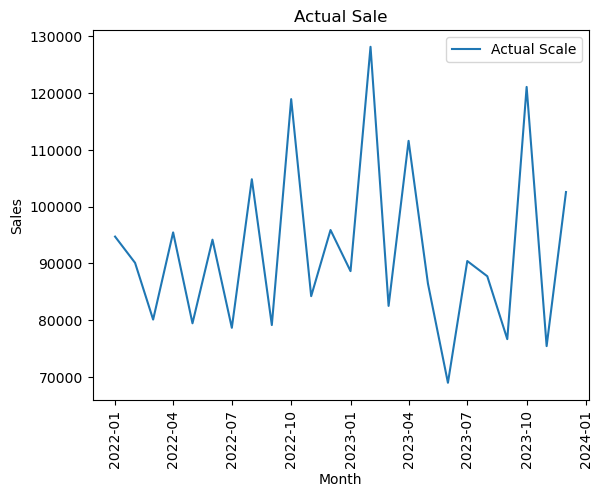

In [10]:
# plot actual sale data
plt.plot(monthly_sales.index, monthly_sales['sale_price'], label='Actual Scale')
plt.title('Actual Sale')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.legend()
plt.show()

In [12]:
# create and fit model
model = ExponentialSmoothing(monthly_sales['sale_price'], seasonal='add', seasonal_periods=12)
fit = model.fit()

# predict forecast for next 12 months
forecast = fit.forecast(12)

/home/phyu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/phyu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


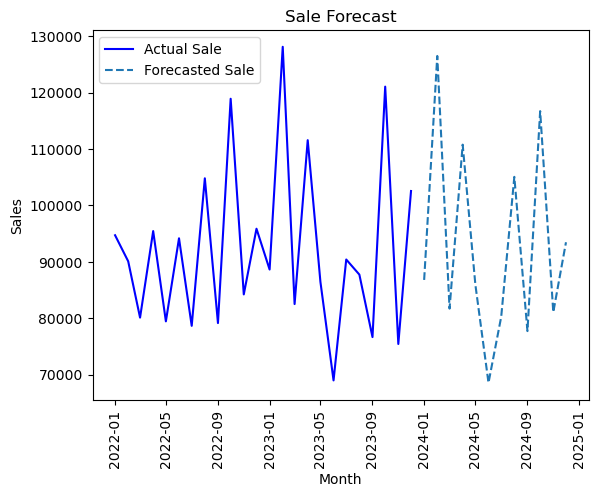

In [13]:
plt.plot(monthly_sales.index, monthly_sales['sale_price'], color='blue',label='Actual Sale')
plt.plot(forecast.index, forecast, label='Forecasted Sale', linestyle='--')
plt.title('Sale Forecast')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.legend()
plt.show()